### Criando um Banco de Dados com as tabelas do Campeonato Brasileiro

In [22]:
# Import de Bibliotecas
import sqlite3 
import pandas as pd
import numpy as np

import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base



In [23]:

# Definir o estilo desejado
style = "plotly_white"  # Exemplo de estilo escuro

# Aplicar o estilo
pio.templates.default = style


In [24]:
#Tratamento inicial dos arquivos CSVs para popular um banco de dados

cb_cartoes = pd.read_csv('campeonato-brasileiro-cartoes.csv')
cb_est_full = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv')
cb_full = pd.read_csv('campeonato-brasileiro-full.csv')
cb_gols = pd.read_csv('campeonato-brasileiro-gols.csv')

cb_gols.columns = ['partida_id', 'rodada', 'clube', 'atleta', 'minuto', 'tipo_de_gol']
cb_est_full.columns = ['partida_id', 'rodada', 'clube', 'chutes', 'chutes_no_alvo', 'posse_de_bola', 'passes', 'precisao_passes', 
                       'faltas', 'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios',]
cb_cartoes.columns = ['partida_id','rodada','clube','cartao','atleta','num_camisa','posicao','minuto']

cb_full['datetime'] = pd.to_datetime(cb_full['data'] + ' ' + cb_full['hora'])
cb_full = cb_full.drop(['data','hora'], axis=1)

In [25]:
#Criando o banco de dados caso não existe e populando com os DataFrames tratados

import sqlite3

conn = sqlite3.connect('CompeticaoUD.db')

arquivos_csv = {
    'cb_cartoes': cb_cartoes,
    'cb_est_full': cb_est_full,
    'cb_full': cb_full,
    'cb_gols': cb_gols
}

for nome_tabela, dataframe in arquivos_csv.items():
    dataframe.to_sql(nome_tabela, conn, if_exists='replace', index=False)

conn.close()

In [26]:
def query(caminho):
    # Criar a conexão com o banco de dados
    engine = create_engine('sqlite:///CompeticaoUD.db')
    
    with open(caminho, 'r') as arquivo:
        consulta = arquivo.read()
    
    # Executar a consulta
    resultado = engine.execute(consulta)
    
    # Ler o resultado em um DataFrame
    df = pd.DataFrame(resultado.fetchall(), columns=resultado.keys())
    
    return df

In [27]:
resultado = query(r'C:\Users\Igor\Desktop\DS\Projetos Portfolios\Comp_Universidade_dados\query_EDA.sql')

## Proposta da Análise exploratória

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
resultado.head()

,Ano,rodada,Mandante,visitante,resultado,chutes_Mandante,chutes_no_alvo_Mandante,posse_de_bola_Mandante,passes_Mandante,precisao_passes_Mandante,faltas_Mandante,cartao_amarelo_Mandante,cartao_vermelho_Mandante,impedimentos_Mandante,escanteios_Mandante,GolsMandante,GolsVisitantes,chutes_Visitante,chutes_no_alvo_Visitante,posse_de_bola_Visitante,passes_Visitante,precisao_passes_Visitante,faltas_Visitante,cartao_amarelo_Visitante,cartao_vermelho_Visitante,impedimentos_Visitante,escanteios_Visitante
0,2003,1,Athletico-PR,Gremio,Vencedor,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1,2003,1,Corinthians,Atletico-MG,Perdedor,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0,3,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2,2003,1,Criciuma,Fluminense,Vencedor,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2,0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
3,2003,1,Cruzeiro,Sao Caetano,Empate,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2,2,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
4,2003,1,Flamengo,Coritiba,Empate,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [30]:
#Verificando colunas com valores nulos.
resultado.isna().mean()

Ano                          0.000000
rodada                       0.000000
Mandante                     0.000000
visitante                    0.000000
resultado                    0.000000
chutes_Mandante              0.000000
chutes_no_alvo_Mandante      0.000000
posse_de_bola_Mandante       0.576904
passes_Mandante              0.000000
precisao_passes_Mandante     0.576904
faltas_Mandante              0.000000
cartao_amarelo_Mandante      0.000000
cartao_vermelho_Mandante     0.000000
impedimentos_Mandante        0.000000
escanteios_Mandante          0.000000
GolsMandante                 0.000000
GolsVisitantes               0.000000
chutes_Visitante             0.003006
chutes_no_alvo_Visitante     0.003006
posse_de_bola_Visitante      0.579910
passes_Visitante             0.003006
precisao_passes_Visitante    0.579910
faltas_Visitante             0.003006
cartao_amarelo_Visitante     0.003006
cartao_vermelho_Visitante    0.003006
impedimentos_Visitante       0.003006
escanteios_V

In [31]:
#Excluindo linhas com missing
resultado = resultado.dropna()

### Estatística Descritiva dos dados

In [32]:
resultado.describe().T

,count,mean,std,min,25%,50%,75%,max
rodada,3354.0,19.248956,10.916831,1.0,10.0,19.0,29.000,38.0
chutes_Mandante,3354.0,12.816488,6.577098,0.0,10.0,13.0,17.000,37.0
chutes_no_alvo_Mandante,3354.0,3.195587,3.005720,0.0,0.0,3.0,5.000,16.0
posse_de_bola_Mandante,3354.0,45.774597,19.225824,0.0,40.0,51.0,58.000,79.0
passes_Mandante,3354.0,383.757007,167.980799,0.0,329.0,413.0,491.000,787.0
precisao_passes_Mandante,3354.0,43.821258,40.674899,0.0,0.0,72.0,82.375,93.0
faltas_Mandante,3354.0,13.264758,6.348122,0.0,11.0,14.0,17.000,32.0
cartao_amarelo_Mandante,3354.0,1.915325,1.479702,0.0,1.0,2.0,3.000,10.0
cartao_vermelho_Mandante,3354.0,0.088849,0.306030,0.0,0.0,0.0,0.000,3.0
impedimentos_Mandante,3354.0,1.516846,1.565100,0.0,0.0,1.0,2.000,10.0


array([[<AxesSubplot: title={'center': 'rodada'}>,
        <AxesSubplot: title={'center': 'chutes_Mandante'}>,
        <AxesSubplot: title={'center': 'chutes_no_alvo_Mandante'}>,
        <AxesSubplot: title={'center': 'posse_de_bola_Mandante'}>,
        <AxesSubplot: title={'center': 'passes_Mandante'}>],
       [<AxesSubplot: title={'center': 'precisao_passes_Mandante'}>,
        <AxesSubplot: title={'center': 'faltas_Mandante'}>,
        <AxesSubplot: title={'center': 'cartao_amarelo_Mandante'}>,
        <AxesSubplot: title={'center': 'cartao_vermelho_Mandante'}>,
        <AxesSubplot: title={'center': 'impedimentos_Mandante'}>],
       [<AxesSubplot: title={'center': 'escanteios_Mandante'}>,
        <AxesSubplot: title={'center': 'GolsMandante'}>,
        <AxesSubplot: title={'center': 'GolsVisitantes'}>,
        <AxesSubplot: title={'center': 'chutes_Visitante'}>,
        <AxesSubplot: title={'center': 'chutes_no_alvo_Visitante'}>],
       [<AxesSubplot: title={'center': 'posse_de_

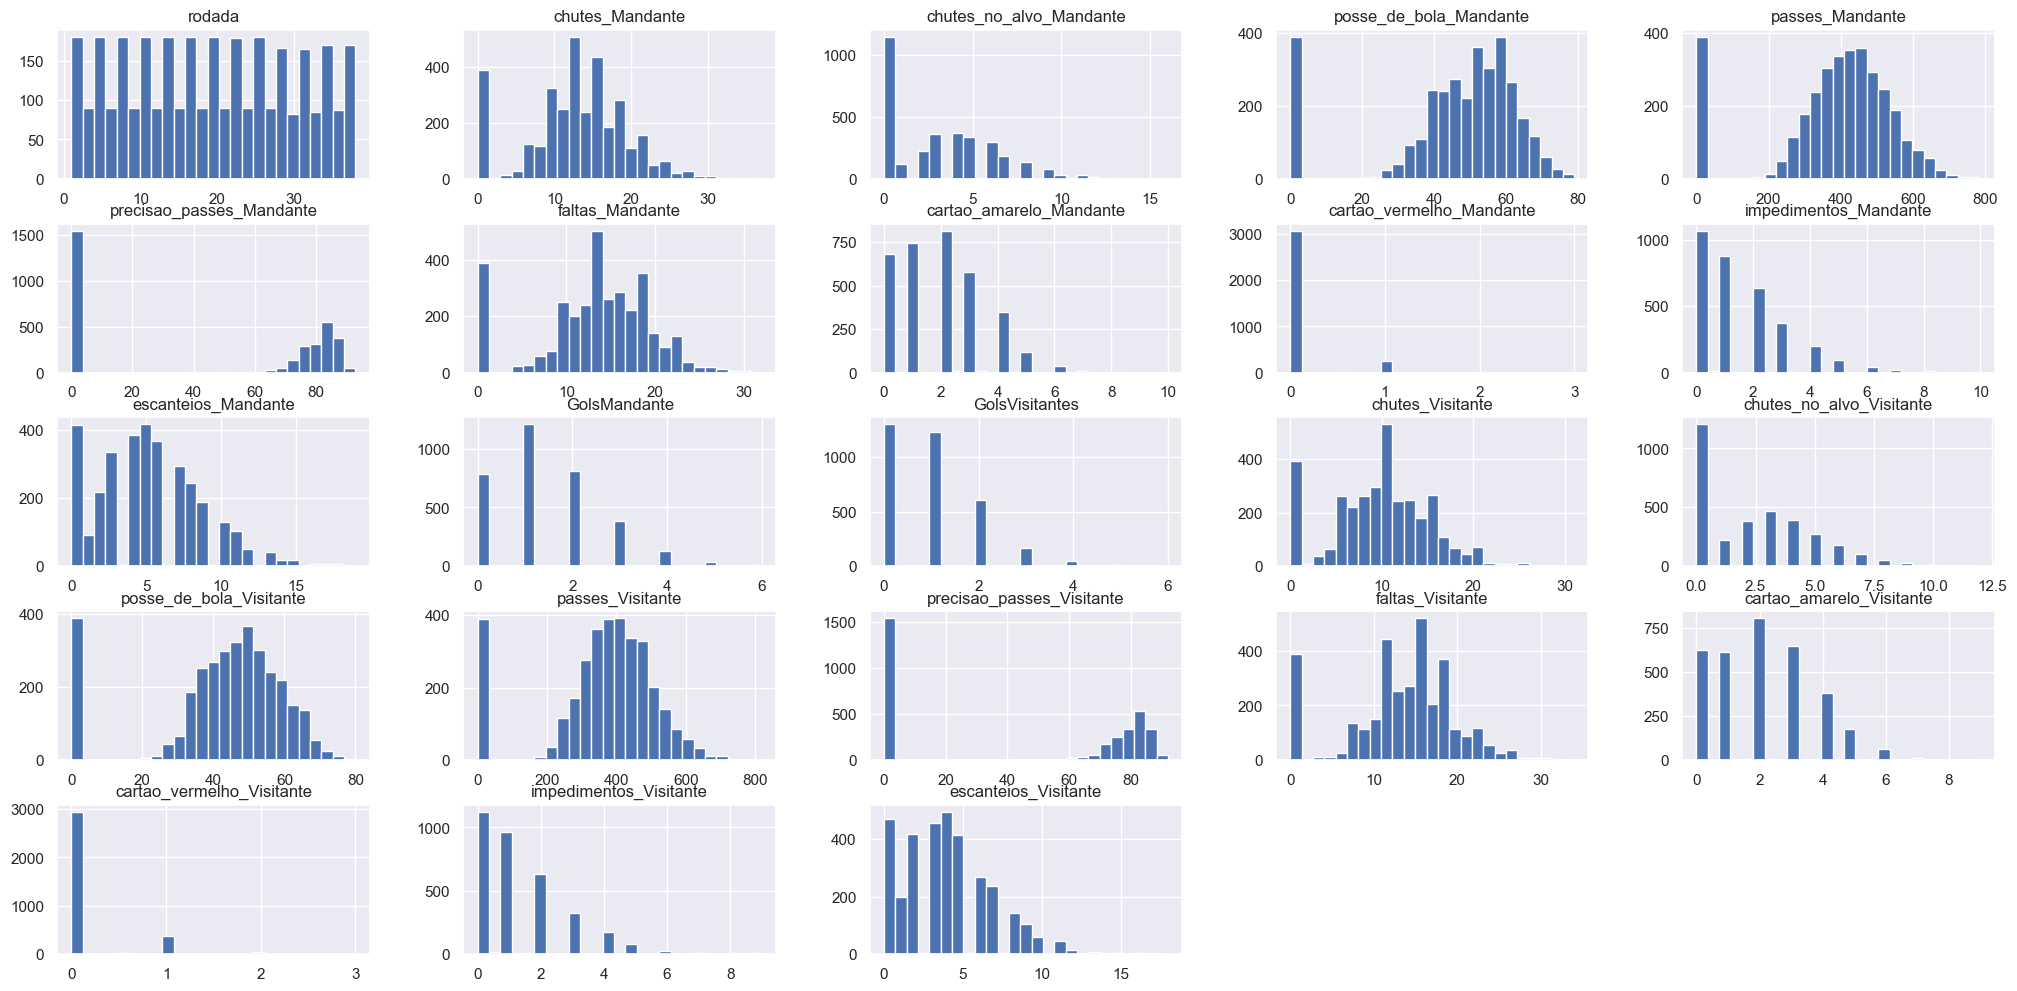

In [33]:
resultado.hist(bins = 25)

### Análise exploratória

In [34]:
aux = resultado.groupby('resultado')['chutes_Mandante', 'chutes_Visitante'].mean().reset_index()
aux2 = resultado.groupby('resultado')['chutes_no_alvo_Mandante', 'chutes_no_alvo_Visitante'].mean().reset_index()

# Combinação dos DataFrames aux e aux2
aux_combined = aux.merge(aux2, on='resultado')

# Renomear as colunas para evitar duplicatas
aux_combined.columns = ['resultado', 'chutes_Mandante', 'chutes_Visitante', 'chutes_no_alvo_Mandante', 'chutes_no_alvo_Visitante']

# Configuração do gráfico de barras
fig = px.bar(aux_combined, x='resultado', 
             y=['chutes_Mandante', 'chutes_Visitante', 'chutes_no_alvo_Mandante', 'chutes_no_alvo_Visitante'],
             barmode='group',
             title="Média de chutes e chutes no alvo de acordo com o resultado do mandante")

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(texttemplate='%{y:.2f}', textposition='inside')

fig.show()

C:\Users\Igor\AppData\Local\Temp\ipykernel_8436\2166132937.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Igor\AppData\Local\Temp\ipykernel_8436\2166132937.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [35]:
aux = resultado.groupby('resultado')['posse_de_bola_Mandante','posse_de_bola_Visitante'].mean().reset_index()


# Configuração do gráfico de barras
fig = px.bar(aux, x='resultado', 
             y=['posse_de_bola_Mandante','posse_de_bola_Visitante'],
             barmode='group',
             title="Média de posse de bola acordo com o resultado do mandante")

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(texttemplate='%{y:.2f}', textposition='inside')

fig.show()

C:\Users\Igor\AppData\Local\Temp\ipykernel_8436\1618937451.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [36]:
aux = resultado.groupby('resultado')['passes_Mandante', 'precisao_passes_Mandante','passes_Visitante', 'precisao_passes_Visitante'].mean().reset_index()
# Criação dos subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Passes Médios", "Precisão no Passe"))

# Gráfico de barras para passes médios
fig.add_trace(go.Bar(
    x=aux['resultado'],
    y=aux['passes_Mandante'],
    name='Passes Mandante',
    text=aux['passes_Mandante'].apply(lambda x: f'{x:.2f}'),
    textposition='inside',
), row=1, col=1)

fig.add_trace(go.Bar(
    x=aux['resultado'],
    y=aux['passes_Visitante'],
    name='Passes Visitante',
    text=aux['passes_Visitante'].apply(lambda x: f'{x:.2f}'),
    textposition='inside',
), row=1, col=1)

# Gráfico de barras para precisão no passe
fig.add_trace(go.Bar(
    x=aux['resultado'],
    y=aux['precisao_passes_Mandante'],
    name='% Precisão Mandante',
    text=aux['precisao_passes_Mandante'].apply(lambda x: f'{x:.2f}%'),
    textposition='inside',
), row=1, col=2)

fig.add_trace(go.Bar(
    x=aux['resultado'],
    y=aux['precisao_passes_Visitante'],
    name='% Precisão Visitante',
    text=aux['precisao_passes_Visitante'].apply(lambda x: f'{x:.2f}%'),
    textposition='inside',
), row=1, col=2)

# Configurações de layout
fig.update_layout(
    title="Média de passes e % de precisão no passe de acordo com o resultado do mandante",
    showlegend=True,
    legend_title_text=None,
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


C:\Users\Igor\AppData\Local\Temp\ipykernel_8436\4286190628.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [37]:

aux = resultado.groupby('resultado')['faltas_Mandante', 'faltas_Visitante'].mean().reset_index()
aux2 = resultado.groupby('resultado')['cartao_amarelo_Mandante', 'cartao_amarelo_Visitante'].mean().reset_index()
aux3 = resultado.groupby('resultado')['cartao_vermelho_Mandante', 'cartao_vermelho_Visitante'].mean().reset_index()

# Combinação dos DataFrames aux, aux2 e aux3
aux_combined = aux.merge(aux2, on='resultado').merge(aux3, on='resultado')

# Renomear as colunas para evitar duplicatas
aux_combined.columns = ['resultado', 'faltas_Mandante', 'faltas_Visitante',
                        'cartao_amarelo_Mandante', 'cartao_amarelo_Visitante',
                        'cartao_vermelho_Mandante', 'cartao_vermelho_Visitante']

# Configuração do gráfico de barras
fig = px.bar(aux_combined, x='resultado', 
             y=['faltas_Mandante', 'faltas_Visitante',
                'cartao_amarelo_Mandante', 'cartao_amarelo_Visitante',
                'cartao_vermelho_Mandante', 'cartao_vermelho_Visitante'],
             barmode='group',
             title="Média de faltas e cartões de acordo com o resultado do mandante")

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

fig.show()

C:\Users\Igor\AppData\Local\Temp\ipykernel_8436\2748478617.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Igor\AppData\Local\Temp\ipykernel_8436\2748478617.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Igor\AppData\Local\Temp\ipykernel_8436\2748478617.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [38]:
# Agrupar por resultado e contar a ocorrência
aux2 = resultado.groupby('resultado').size().reset_index(name='count')

# Configuração do gráfico de barras
fig = px.bar(aux2, x='resultado',
             y='count',
             title="Quantidade de vitórias, derrotas e empates dos mandantes")

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()


In [39]:
# Agrupar por resultado e calcular a soma dos gols para mandante e visitante
aux = resultado.groupby('resultado')['GolsMandante', 'GolsVisitantes'].mean().reset_index()

# Configuração do gráfico de barras
fig = px.bar(aux, x='resultado',
             y=['GolsMandante', 'GolsVisitantes'],
             barmode='group',
             title="Média de gols de mandante e visitante")

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

fig.show()


C:\Users\Igor\AppData\Local\Temp\ipykernel_8436\1774317884.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Após vermos o que mais impacta no resultado, vamos tentar entender a correlação de algumas estatísticas com o Gol 

In [40]:
resultado.tail()

df_estat = resultado[['chutes_Mandante',
                      'chutes_no_alvo_Mandante',
                      'posse_de_bola_Mandante',
                      'passes_Mandante',
                      'precisao_passes_Mandante',
                      'faltas_Mandante',
                      'cartao_amarelo_Mandante',
                      'cartao_vermelho_Mandante',
                      'impedimentos_Mandante',
                      'escanteios_Mandante',
                      'GolsMandante',
                      'GolsVisitantes',
                      'chutes_Visitante',
                      'chutes_no_alvo_Visitante',
                      'posse_de_bola_Visitante',
                      'passes_Visitante',
                      'precisao_passes_Visitante',
                      'faltas_Visitante',
                      'cartao_amarelo_Visitante',
                      'cartao_vermelho_Visitante',
                      'impedimentos_Visitante',
                      'escanteios_Visitante','resultado']]

df_estat['resultado'] = resultado['resultado'].map(lambda x: 1 if x == 'Vencedor' else (0 if x == 'Empate' else -1))


C:\Users\Igor\AppData\Local\Temp\ipykernel_8436\2401773562.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: >

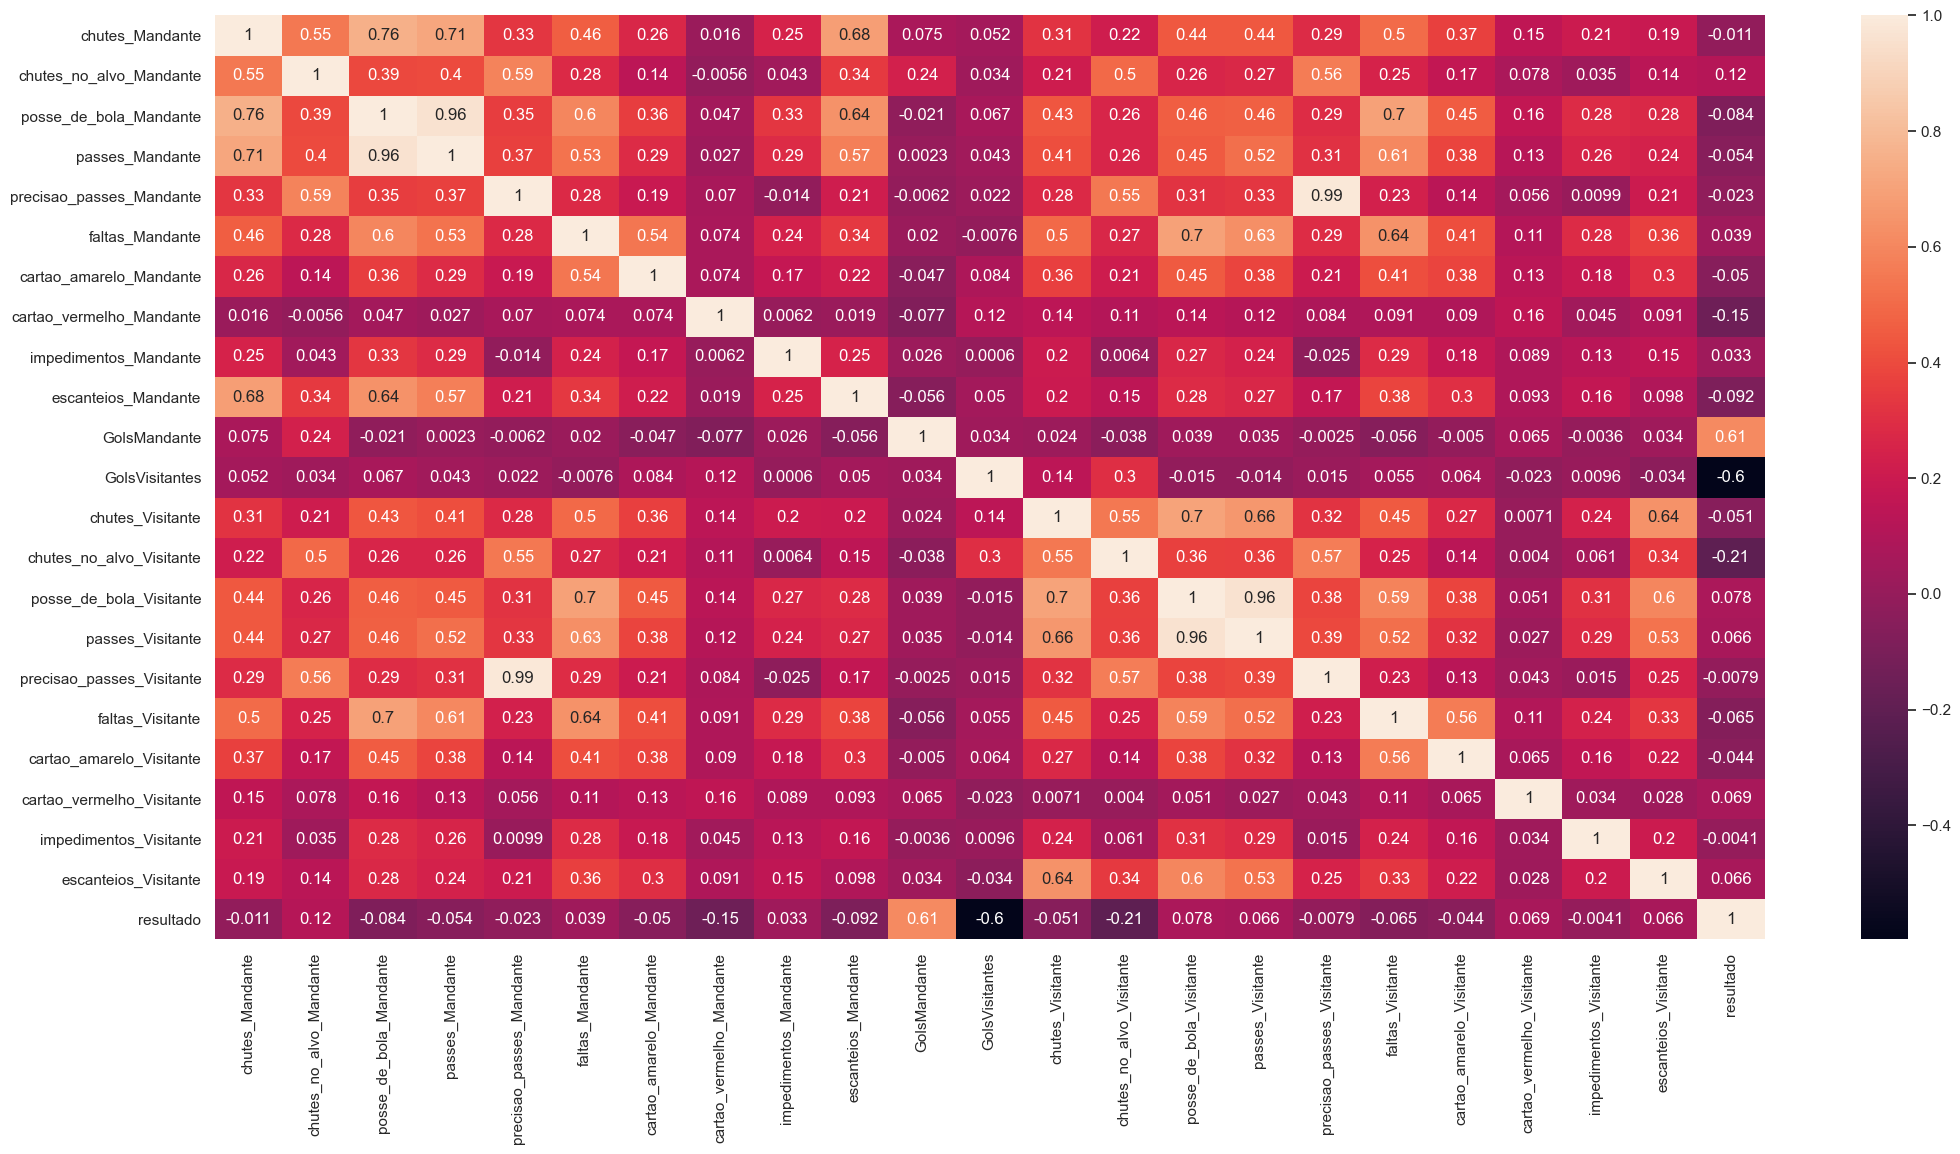

In [41]:
sns.heatmap(df_estat.corr(),annot=True)

### Resultados

- Mandantes geralmente registram uma maior quantidade de chutes e chutes no alvo, independentemente do resultado do jogo. Isso indica que a suposição de que o mandante tende a adotar uma postura mais ofensiva é verdadeira.

- Quando os mandantes vencem a partida, a posse de bola é semelhante, mas quando perdem, a posse de bola dos mandantes é maior. Isso levanta a possibilidade de que a estratégia de jogo mais defensiva adotada pelos visitantes possa dificultar a vitória do time da casa.

- Em relação aos passes, os mandantes parecem passar a bola com mais frequência em jogos em que empatam ou perdem. Isso sugere que a postura do visitante pode influenciar o estilo de jogo dos mandantes.

- No que diz respeito a faltas e cartões, os visitantes que adotam uma abordagem mais agressiva, cometendo mais faltas, parecem obter melhores resultados, como um empate ou uma vitória em território adversário. Além disso, os visitantes tendem a cometer menos faltas do que os mandantes quando perdem.

- Considerando a quantidade de vitórias, derrotas e empates dos visitantes, foi observado que, pelo menos nesse campeonato, os mandantes têm uma vantagem sobre os visitantes nos jogos.

- Essas descobertas iniciais fornecem insights valiosos para análises futuras e podem ser exploradas para compreender melhor os fatores que influenciam os resultados das partidas de futebol entre mandantes e visitantes.


### Tratamento Feito no SQL

In [42]:
with tabela_est_mandante as (
    SELECT 
        strftime("%Y", t2.datetime) as Ano,
        t1.clube as Mandante,
        t2.visitante as visitante,
        t1.rodada as rodada,
        t2.vencedor,
        (case when t1.clube = t2.mandante then 'Mandante' else 'Visitante' end) as Mandante_Visitante,
        avg(t1.chutes) as chutes_Mandante,
        avg(t1.chutes_no_alvo) as chutes_no_alvo_Mandante,
        avg(t1.posse_de_bola) as posse_de_bola_Mandante,
        avg(t1.passes) as passes_Mandante,
        avg(t1.precisao_passes) as precisao_passes_Mandante,
        avg(t1.faltas) as faltas_Mandante,
        avg(t1.cartao_amarelo) as cartao_amarelo_Mandante,
        avg(t1.cartao_vermelho) as cartao_vermelho_Mandante,
        avg(t1.impedimentos) as impedimentos_Mandante,
        avg(t1.escanteios) as escanteios_Mandante,
        sum(t2.mandante_Placar) as golsFeitos_Mandante,
        sum(t2.visitante_Placar) as golsSofrido_Mandante
    FROM cb_est_full AS t1
    LEFT JOIN cb_full AS t2 ON t1.partida_id = t2.ID
    WHERE Mandante_Visitante = 'Mandante'
    group by Ano, t1.rodada, t1.clube
),
tabela_est_Visitante as ( 
        SELECT 
        strftime("%Y", t2.datetime) as Ano,
        t1.clube as Visitante,
        t2.mandante as Mandante,
        t1.rodada as rodada,
        (case when t1.clube = t2.mandante then 'Mandante' else 'Visitante' end) as Mandante_Visitante,
        avg(t1.chutes) as chutes_Visitante,
        avg(t1.chutes_no_alvo) as chutes_no_alvo_Visitante,
        avg(t1.posse_de_bola) as posse_de_bola_Visitante,
        avg(t1.passes) as passes_Visitante,
        avg(t1.precisao_passes) as precisao_passes_Visitante,
        avg(t1.faltas) as faltas_Visitante,
        avg(t1.cartao_amarelo) as cartao_amarelo_Visitante,
        avg(t1.cartao_vermelho) as cartao_vermelho_Visitante,
        avg(t1.impedimentos) as impedimentos_Visitante,
        avg(t1.escanteios) as escanteios_Visitante,
        sum(t2.visitante_Placar) as golsFeitos_Visitante,
        sum(t2.mandante_Placar ) as golsSofridos_Visitante
    FROM cb_est_full AS t1
    LEFT JOIN cb_full AS t2 ON t1.partida_id = t2.ID
    WHERE Mandante_Visitante = 'Visitante'
    group by Ano, t1.rodada, t1.clube
),
tb_EDA as (
    select  t1.Ano,
            t1.rodada,
            t1.Mandante,
            t1.visitante,
            CASE WHEN vencedor = t1.mandante AND vencedor != '-' THEN 'Vencedor'
                WHEN vencedor != t1.mandante AND vencedor != '-' THEN 'Perdedor'
                WHEN vencedor = '-' THEN 'Empate'
            END AS resultado,
            t1.chutes_Mandante,
            t1.chutes_no_alvo_Mandante,
            t1.posse_de_bola_Mandante,
            t1.passes_Mandante,
            t1.precisao_passes_Mandante,
            t1.faltas_Mandante,
            t1.cartao_amarelo_Mandante,
            t1.cartao_vermelho_Mandante,
            t1.impedimentos_Mandante,
            t1.escanteios_Mandante,
            t1.golsFeitos_Mandante as GolsMandante,
            t1.golsSofrido_Mandante as GolsVisitantes,
            t2.chutes_Visitante,
            t2.chutes_no_alvo_Visitante,
            t2.posse_de_bola_Visitante,
            t2.passes_Visitante,
            t2.precisao_passes_Visitante,
            t2.faltas_Visitante,
            t2.cartao_amarelo_Visitante,
            t2.cartao_vermelho_Visitante,
            t2.impedimentos_Visitante,
            t2.escanteios_Visitante
    from tabela_est_Mandante as t1
    left join tabela_est_Visitante as t2
        on t1.Ano = t2.Ano
        and t1.mandante = t2.mandante
        and t1.visitante = t2.visitante
        and t1.rodada = t2.rodada
)


select * from tb_EDA

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2080646215.py, line 2)